[ 4358.   4814.   5289.5]


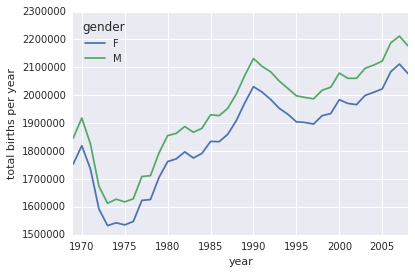

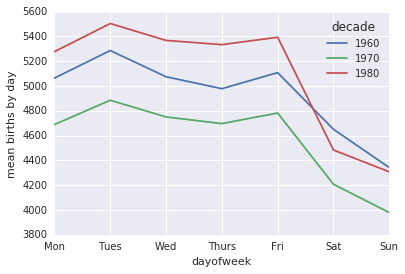

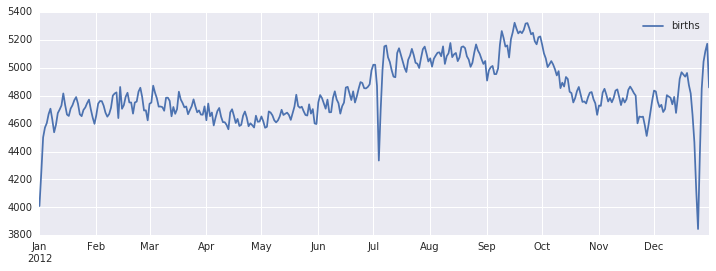

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

sns.set()
births = pd.read_csv('births.csv')
births['decade'] = (10 * (births['year'] // 10))

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')


quartiles = np.percentile(births['births'], [25, 50, 75])
print(quartiles)
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0]) 

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)